In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
global_economy = pd.read_csv('fpppy_data\data\global_economy.csv')
global_economy.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shivk\AppData\Local\Temp\ipykernel_1592\2331990622.py:1: SyntaxWarning: invalid escape sequence '\d'
  global_economy = pd.read_csv('fpppy_data\data\global_economy.csv')


,unique_id,Code,ds,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [4]:
global_economy['GDP_per_capita'] = global_economy['GDP']/global_economy['Population']

In [8]:
country = global_economy['Code'].unique()

C:\Users\shivk\AppData\Local\Temp\ipykernel_1592\2819281060.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


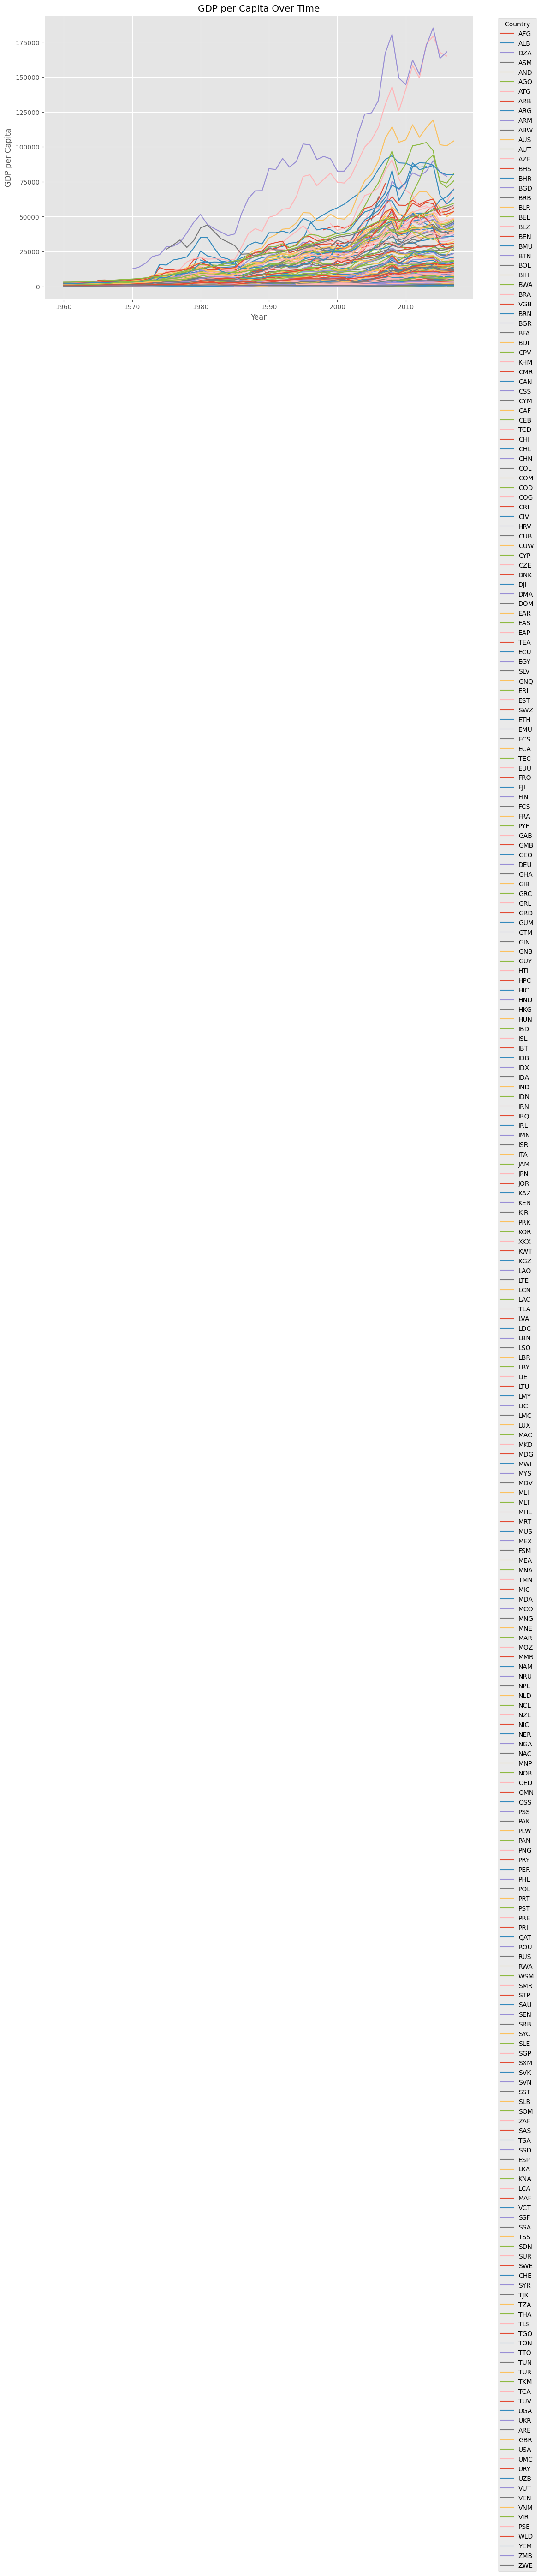

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

for c in country:
    country_data = global_economy.query('`Code` == @c')
    ax.plot(country_data['ds'], country_data['GDP_per_capita'], label=c)

ax.set_title('GDP per Capita Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('GDP per Capita')
ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.style.use('ggplot')

In [21]:
global_economy = pd.read_csv('fpppy_data/data/global_economy.csv')
aus_livestock = pd.read_csv("fpppy_data/data/aus_livestock.csv")
vic_elec = pd.read_csv('fpppy_data/data/vic_elec.csv')
aus_production = pd.read_csv('fpppy_data/data/aus_production.csv')

In [ ]:
global_economy['GDP_per_Capita'] = global_economy['GDP']/global_economy['Population']

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5
...,...,...,...,...,...,...,...
213,2009-04-01,398,NaN,NaN,2160,57471,238
214,2009-07-01,419,NaN,NaN,2325,58394,252
215,2009-10-01,488,NaN,NaN,2273,57336,210
216,2010-01-01,414,NaN,NaN,1904,58309,205


In [54]:
global_economy = global_economy.query('`Code` == "USA"').filter(['ds', 'GDP_per_Capita']).rename({'GDP_per_Capita': 'y'}, axis=1)
aus_livestock = aus_livestock.query('`unique_id` == "Victoria_Bulls, bullocks and steers"').filter(['ds', 'y'])
vic_elec = vic_elec.query('`unique_id` == "Demand"').filter(['ds', 'y'])
aus_production = aus_production.filter(['ds', 'Gas']).rename({'Gas': 'y'}, axis=1)

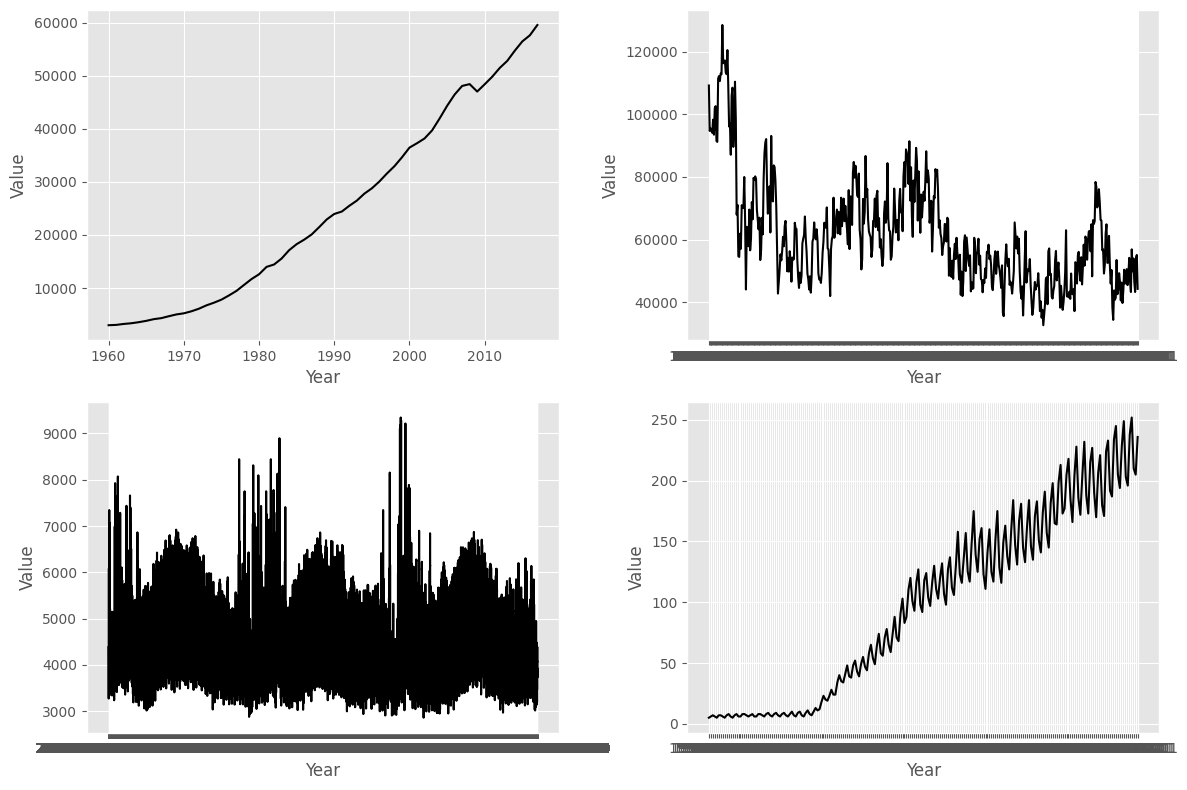

In [56]:
dfs = [global_economy, aus_livestock, vic_elec, aus_production]
a = np.arange(4)
shape = np.reshape(a, (2, -1)).shape
indices = list(zip(*np.unravel_index(a, shape)))

fig, ax = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 8))

for idx, df in enumerate(dfs):
    ax[indices[idx]].plot(df['ds'], df['y'], c='k')
    ax[indices[idx]].set_xlabel('Year')
    ax[indices[idx]].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [72]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [62]:
plt.style.use('ggplot')

In [60]:
canadian_gas = pd.read_csv('fpppy_data/data/canadian_gas.csv')

0.6187239164335289


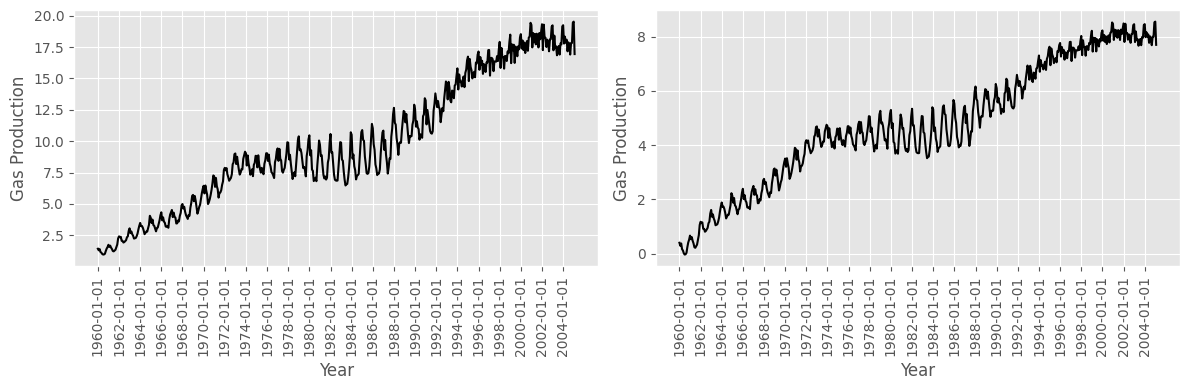

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(canadian_gas['ds'], canadian_gas['y'], c='k')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Gas Production')
ax[0].set_xticks(canadian_gas['ds'][::24], canadian_gas['ds'][::24], rotation=90)

updated_series, lambda_ = stats.boxcox(canadian_gas['y'])
print(lambda_)

ax[1].plot(canadian_gas['ds'], updated_series, c='k')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Gas Production')
ax[1].set_xticks(canadian_gas['ds'][::24], canadian_gas['ds'][::24], rotation=90)

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
aus_retail = pd.read_csv('fpppy_data/data/aus_retail.csv')
aus_retail.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-04-01,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-05-01,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-06-01,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-07-01,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-08-01,3.6


In [4]:
np.random.seed(12345678)
random_series_id = np.random.choice(aus_retail['Series ID'].unique(), 1)[0]
myseries = aus_retail.query('`Series ID` == @random_series_id')

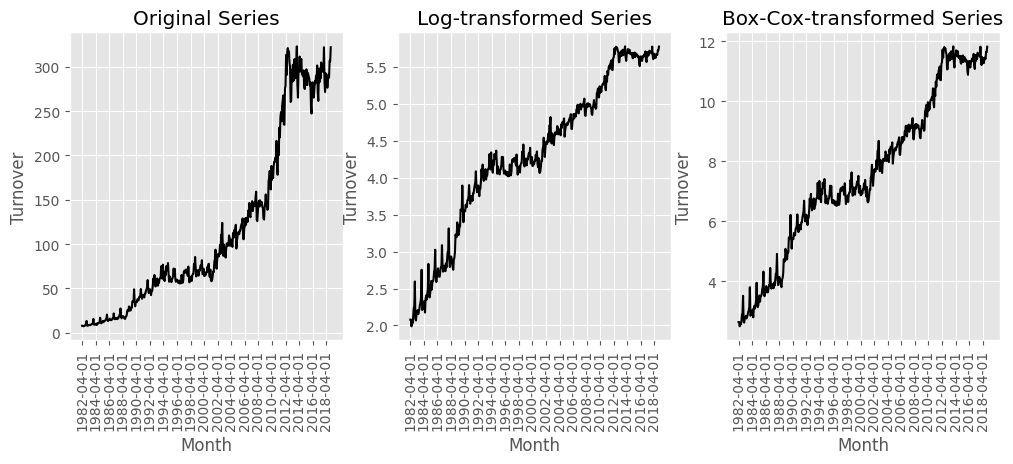

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes[0].plot(myseries['Month'], myseries['Turnover'], c='k')
axes[0].set_xticks(myseries['Month'][::24], myseries['Month'][::24], rotation=90)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Turnover')
axes[0].set_title('Original Series')

axes[1].plot(myseries['Month'], np.log(myseries['Turnover']), c='k')
axes[1].set_xticks(myseries['Month'][::24], myseries['Month'][::24], rotation=90)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Turnover')
axes[1].set_title('Log-transformed Series')

axes[2].plot(myseries['Month'], stats.boxcox(myseries['Turnover'])[0], c='k')
axes[2].set_xticks(myseries['Month'][::24], myseries['Month'][::24], rotation=90)
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Turnover')
axes[2].set_title('Box-Cox-transformed Series')

plt.show()

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
plt.style.use('ggplot')

In [36]:
aus_production_tobacco = pd.read_csv('fpppy_data/data/aus_production.csv').filter(['ds', 'Tobacco']).rename({'Tobacco': 'y'}, axis=1)
aus_production_tobacco['y'] = aus_production_tobacco['y'].fillna(aus_production_tobacco['y'].mean()) + max(abs(aus_production_tobacco['y'].min()), 1)
ansett_economy = pd.read_csv('fpppy_data/data/ansett.csv').query('`Class` == "Economy"').filter(['ds', 'y'])
ansett_economy['y'] = ansett_economy['y'].fillna(ansett_economy['y'].mean()) + max(abs(ansett_economy['y'].min()), 1)
pedestrian_scs = pd.read_csv('fpppy_data/data/pedestrian.csv').query('`unique_id` == "Southern Cross Station"').filter(['ds', 'y'])
pedestrian_scs['y'] = pedestrian_scs['y'].fillna(pedestrian_scs['y'].mean()) + max(abs(pedestrian_scs['y'].min()), 1)

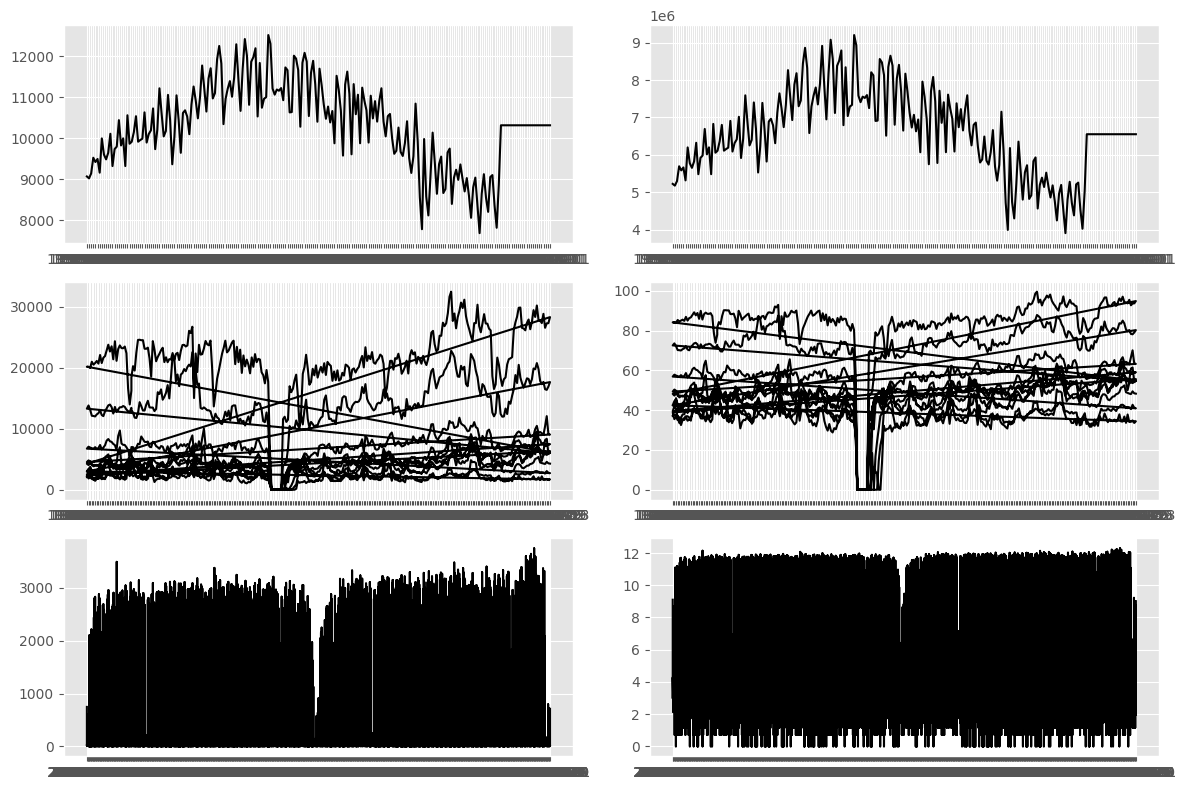

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for idx, df in enumerate([aus_production_tobacco, ansett_economy, pedestrian_scs]):
    axes[idx, 0].plot(df['ds'], df['y'], c='k')
    axes[idx, 1].plot(df['ds'], stats.boxcox(df['y'])[0], c='k')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

In [84]:
rng = np.random.default_rng(42)
s = pd.Series(rng.standard_normal(7))
s.rolling(window=5, center=True).mean().rolling(window=3, center=True).mean()


0         NaN
1         NaN
2         NaN
3   -0.335455
4         NaN
5         NaN
6         NaN
dtype: float64

In [86]:
w = pd.Series(np.array([0.067, 0.133, 0.200, 0.200, 0.200, 0.133, 0.067]))
ws = (s * w).rolling(7).sum()/w.sum()
ws

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6   -0.33453
dtype: float64

In [87]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [88]:
plt.style.use('ggplot')

In [140]:
gas = pd.read_csv('fpppy_data/data/aus_production.csv').filter(['ds', 'Gas']).rename({'Gas': 'y'}, axis=1)
gas.head()

,ds,y
0,1956-01-01,5
1,1956-04-01,6
2,1956-07-01,7
3,1956-10-01,6
4,1957-01-01,5


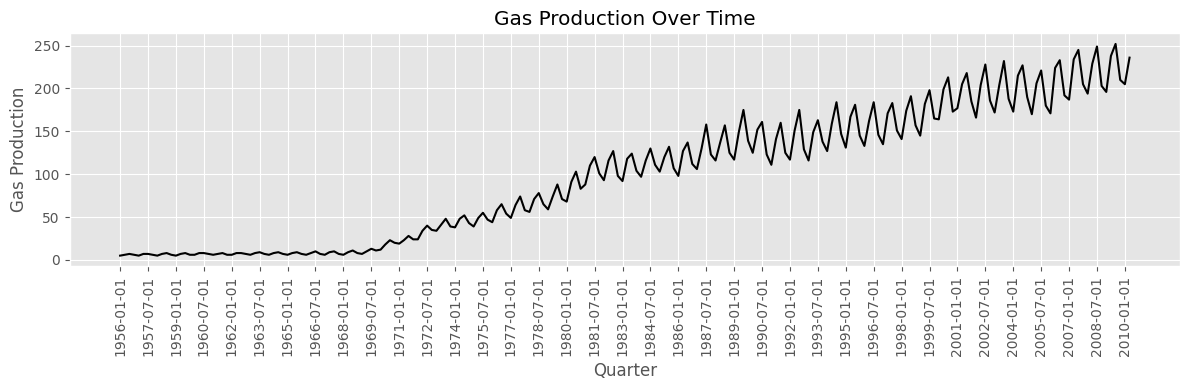

In [104]:
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()

ax.plot(gas['ds'], gas['y'], c='k')
ax.set_xticks(gas['ds'][::6], gas['ds'][::6], rotation=90)
ax.set_xlabel('Quarter')
ax.set_ylabel('Gas Production')
ax.set_title('Gas Production Over Time')

plt.tight_layout()
plt.show()

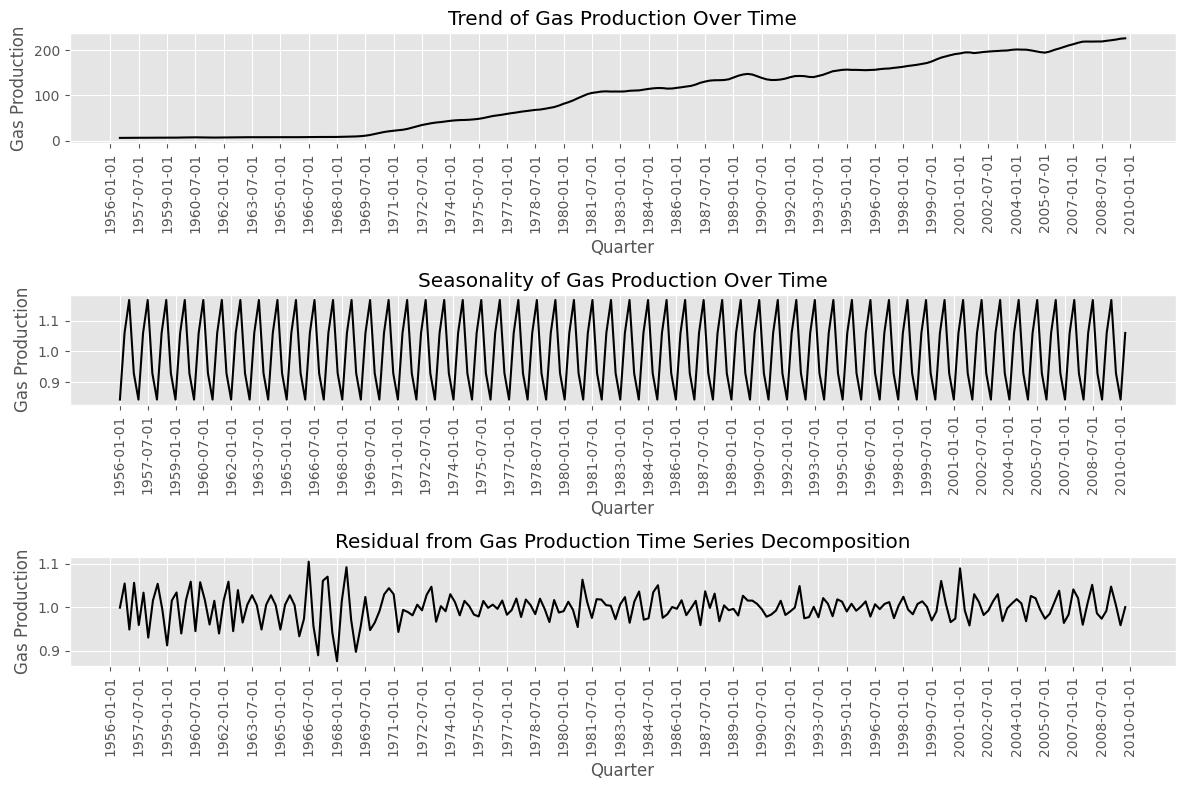

In [117]:
dcmp = seasonal_decompose(gas['y'], model='multiplicative', period=4)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

axes[0].plot(gas['ds'], dcmp.trend, c='k')
axes[0].set_xticks(gas['ds'][::6], gas['ds'][::6], rotation=90)
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Gas Production')
axes[0].set_title('Trend of Gas Production Over Time')

axes[1].plot(gas['ds'], dcmp.seasonal, c='k')
axes[1].set_xticks(gas['ds'][::6], gas['ds'][::6], rotation=90)
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Gas Production')
axes[1].set_title('Seasonality of Gas Production Over Time')

axes[2].plot(gas['ds'], dcmp.resid, c='k')
axes[2].set_xticks(gas['ds'][::6], gas['ds'][::6], rotation=90)
axes[2].set_xlabel('Quarter')
axes[2].set_ylabel('Gas Production')
axes[2].set_title('Residual from Gas Production Time Series Decomposition')

plt.tight_layout()
plt.show()


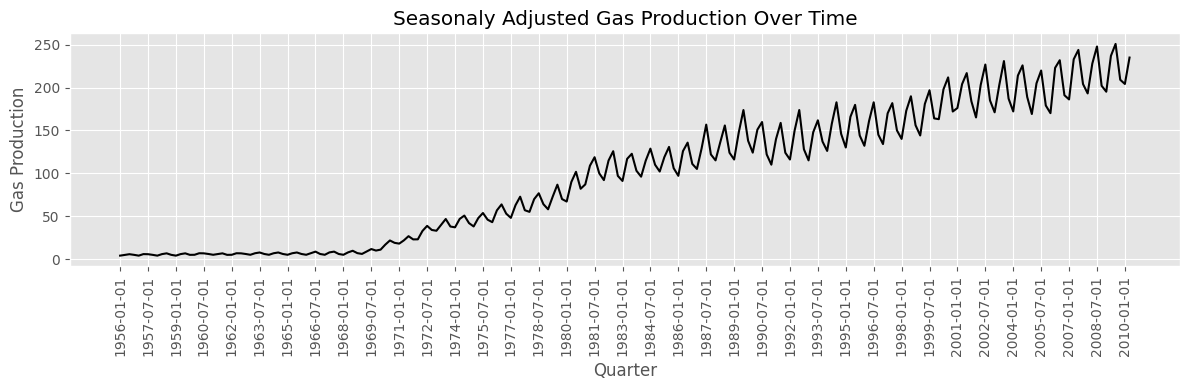

In [122]:
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()

ax.plot(gas['ds'], gas['y']-dcmp.seasonal, c='k')
ax.set_xticks(gas['ds'][::6], gas['ds'][::6], rotation=90)
ax.set_xlabel('Quarter')
ax.set_ylabel('Gas Production')
ax.set_title('Seasonaly Adjusted Gas Production Over Time')

plt.tight_layout()
plt.show()

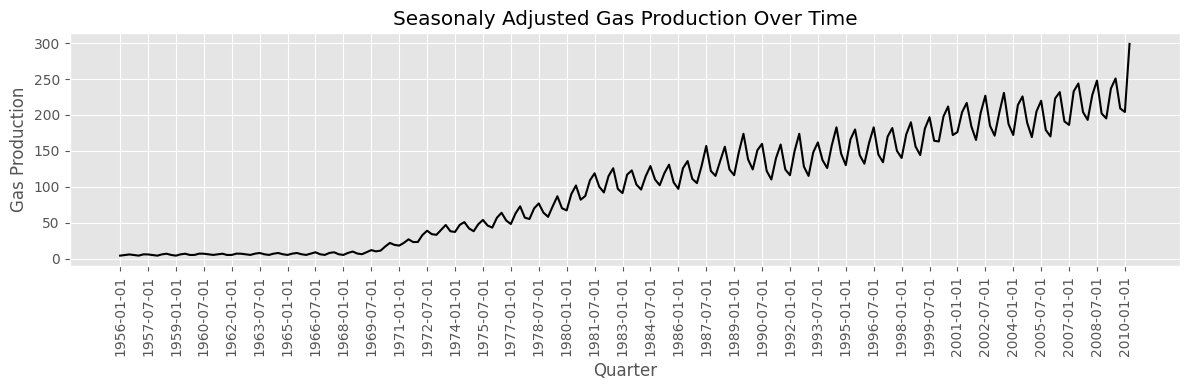

In [142]:
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()


gas['adjY'] = gas['y'].copy()
gas.loc[gas.shape[0]-1, 'adjY'] = 300

dcmp = seasonal_decompose(gas['adjY'], model='multiplicative', period=4)

ax.plot(gas['ds'], (gas['adjY']-dcmp.seasonal), c='k')
ax.set_xticks(gas['ds'][::6], gas['ds'][::6], rotation=90)
ax.set_xlabel('Quarter')
ax.set_ylabel('Gas Production')
ax.set_title('Seasonaly Adjusted Gas Production Over Time')

plt.tight_layout()
plt.show()

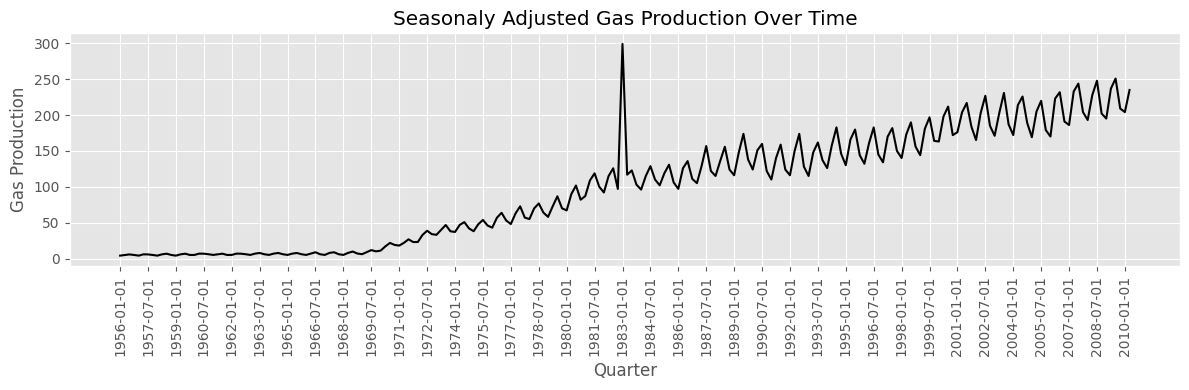

In [143]:
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()


gas['adjY'] = gas['y'].copy()
gas.loc[(gas.shape[0]-1)//2, 'adjY'] = 300

dcmp = seasonal_decompose(gas['adjY'], model='multiplicative', period=4)

ax.plot(gas['ds'], (gas['adjY']-dcmp.seasonal), c='k')
ax.set_xticks(gas['ds'][::6], gas['ds'][::6], rotation=90)
ax.set_xlabel('Quarter')
ax.set_ylabel('Gas Production')
ax.set_title('Seasonaly Adjusted Gas Production Over Time')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
aus_retail = pd.read_csv('fpppy_data/data/aus_retail.csv')

In [9]:
np.random.seed(12345678)
random_series_id = np.random.choice(aus_retail['Series ID'].unique(), 1)[0]
myseries = aus_retail.query('`Series ID` == @random_series_id')
myseries.head()

,State,Industry,Series ID,Month,Turnover
55712,Western Australia,"Cafes, restaurants and catering services",A3349910A,1982-04-01,8.0
55713,Western Australia,"Cafes, restaurants and catering services",A3349910A,1982-05-01,8.0
55714,Western Australia,"Cafes, restaurants and catering services",A3349910A,1982-06-01,7.3
55715,Western Australia,"Cafes, restaurants and catering services",A3349910A,1982-07-01,7.8
55716,Western Australia,"Cafes, restaurants and catering services",A3349910A,1982-08-01,7.6


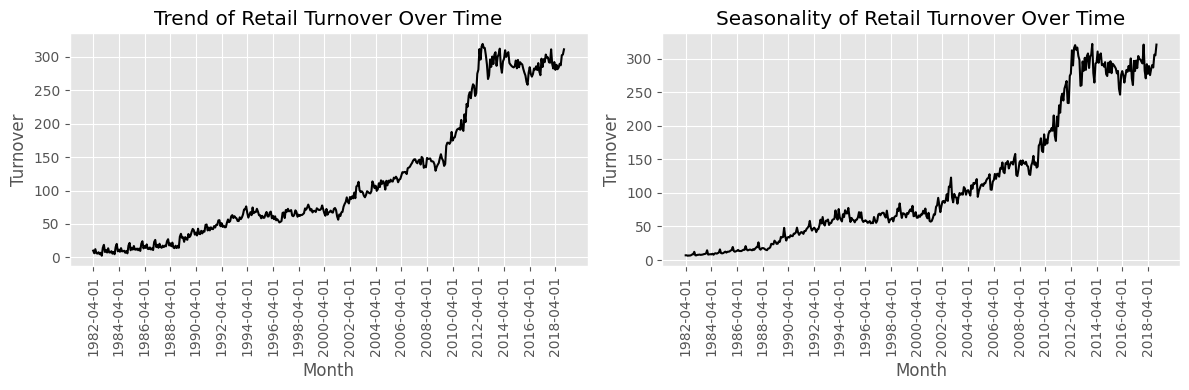

In [12]:
fig, axes = plt.subplots(nrows=1,  ncols=2, figsize=(12, 4))

adcmp = seasonal_decompose(myseries['Turnover'], model='additive', period=12)
mdcmp = seasonal_decompose(myseries['Turnover'], model='multiplicative', period=12)

axes[0].plot(myseries['Month'], myseries['Turnover']-adcmp.seasonal, c='k')
axes[0].set_xticks(myseries['Month'][::24], myseries['Month'][::24], rotation=90)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Turnover')
axes[0].set_title('Trend of Retail Turnover Over Time')

axes[1].plot(myseries['Month'], myseries['Turnover']-mdcmp.seasonal, c='k')
axes[1].set_xticks(myseries['Month'][::24], myseries['Month'][::24], rotation=90)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Turnover')
axes[1].set_title('Seasonality of Retail Turnover Over Time')

plt.tight_layout()
plt.show()

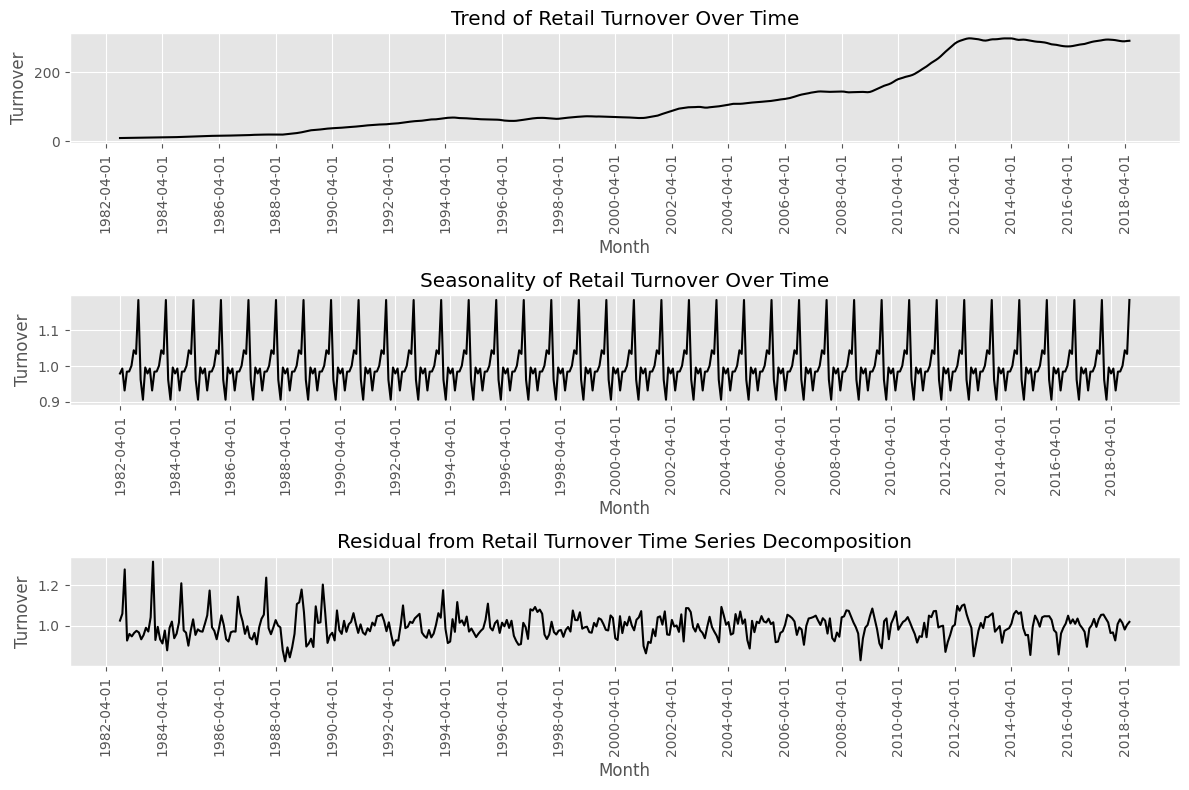

In [8]:
fig, axes = plt.subplots(nrows=3,  ncols=1, figsize=(12, 8))

dcmp = seasonal_decompose(myseries['Turnover'], model='multiplicative', period=12)

axes[0].plot(myseries['Month'], dcmp.trend, c='k')
axes[0].set_xticks(myseries['Month'][::24], myseries['Month'][::24], rotation=90)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Turnover')
axes[0].set_title('Trend of Retail Turnover Over Time')

axes[1].plot(myseries['Month'], dcmp.seasonal, c='k')
axes[1].set_xticks(myseries['Month'][::24], myseries['Month'][::24], rotation=90)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Turnover')
axes[1].set_title('Seasonality of Retail Turnover Over Time')

axes[2].plot(myseries['Month'], dcmp.resid, c='k')
axes[2].set_xticks(myseries['Month'][::24], myseries['Month'][::24], rotation=90)
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Turnover')
axes[2].set_title('Residual from Retail Turnover Time Series Decomposition')

plt.tight_layout()
plt.show()

* There is a strong uptrend in the data.
* The seasonal variation is narrower in the beginning and wider at the end, indicative of multiplicative model.
* Around 160 on the x-axis, there is a presence of an outlier.
* There is a sudden drop in the number of persons in the civilian labour force in the starting of 1991, however, from May, 1991 onwards it started gaining momentum again.
* January month accross the years have the lowest number of persons in the civilian labour force while the highest is in the month of December.
* There is a visible impact of the recession for the year of 1991/1992. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
plt.style.use('ggplot')

In [3]:
canadian_gas = pd.read_csv('fpppy_data/data/canadian_gas.csv')
canadian_gas.head()

,unique_id,ds,y
0,Canadian gas production,1960-01-01,1.4306
1,Canadian gas production,1960-02-01,1.3059
2,Canadian gas production,1960-03-01,1.4022
3,Canadian gas production,1960-04-01,1.1699
4,Canadian gas production,1960-05-01,1.1161


In [19]:
dcmp = seasonal_decompose(canadian_gas['y'], model='additive', period=12)

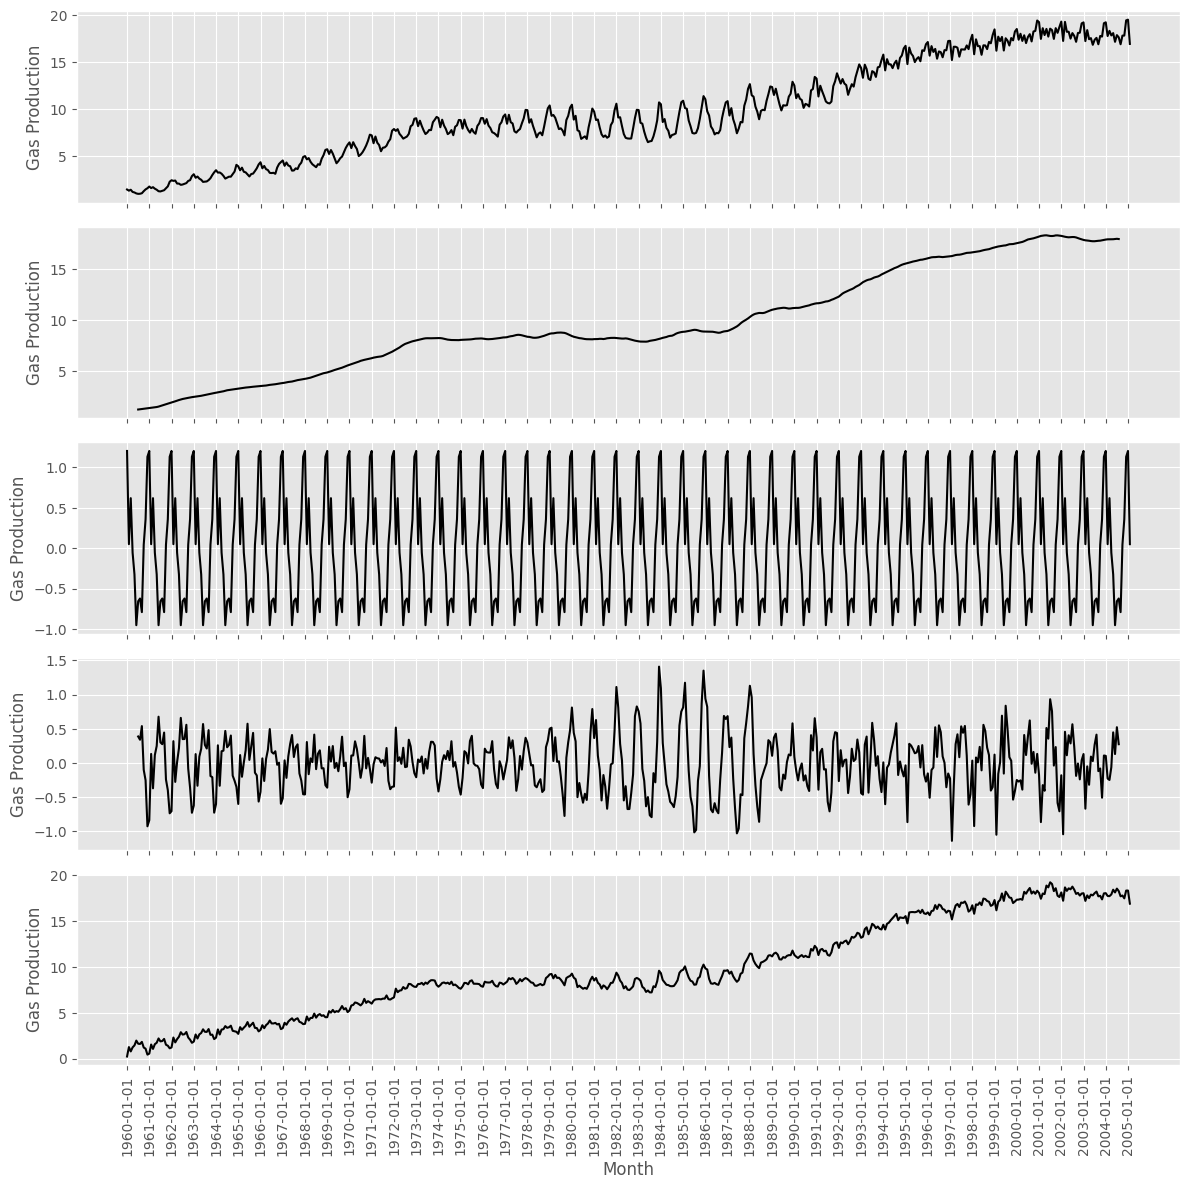

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 12), sharex=True)

axes[0].plot(canadian_gas['ds'], canadian_gas['y'], c='k')
axes[0].set_ylabel('Gas Production')
axes[0].set_xticks(canadian_gas['ds'][::12], canadian_gas['ds'][::12], rotation=90)

axes[1].plot(canadian_gas['ds'], dcmp.trend, c='k')
axes[1].set_ylabel('Gas Production')
axes[1].set_xticks(canadian_gas['ds'][::12], canadian_gas['ds'][::12], rotation=90)

axes[2].plot(canadian_gas['ds'], dcmp.seasonal, c='k')
axes[2].set_ylabel('Gas Production')
axes[2].set_xticks(canadian_gas['ds'][::12], canadian_gas['ds'][::12], rotation=90)

axes[3].plot(canadian_gas['ds'], dcmp.resid, c='k')
axes[3].set_ylabel('Gas Production')
axes[3].set_xticks(canadian_gas['ds'][::12], canadian_gas['ds'][::12], rotation=90)

axes[4].plot(canadian_gas['ds'], canadian_gas['y']-dcmp.seasonal, c='k')
axes[4].set_xlabel('Month')
axes[4].set_ylabel('Gas Production')
axes[4].set_xticks(canadian_gas['ds'][::12], canadian_gas['ds'][::12], rotation=90)

plt.tight_layout()
plt.show()

np.float64(1.251753530092603)